## The Lorenz chaotic attractor

This example shows the construction of a classic chaotic dynamical system:
the Lorenz "butterfly" attractor. The equations are:

$$
\dot{x}_0 = \sigma(x_1 - x_0) \\\
\dot{x}_1 = x_0 (\rho - x_2) - x_1  \\\
\dot{x}_2 = x_0 x_1 - \beta x_2
$$

Since $x_2$ is centered around approximately $\rho$,
and since NEF ensembles are usually optimized
to represent values within a certain radius of the origin,
we substitute $x_2' = x_2 - \rho$, giving these equations:
$$
\dot{x}_0 = \sigma(x_1 - x_0) \\\
\dot{x}_1 = - x_0 x_2' - x_1 \\\
\dot{x}_2' = x_0 x_1 - \beta (x_2' + \rho) - \rho
$$

For more information, see
http://compneuro.uwaterloo.ca/publications/eliasmith2005b.html
"Chris Eliasmith. A unified approach to building
and controlling spiking attractor networks.
Neural computation, 7(6):1276-1314, 2005."

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import nengo

In [2]:
tau = 0.1
sigma = 10
beta = 8.0 / 3
rho = 28


def feedback(x):
    dx0 = -sigma * x[0] + sigma * x[1]
    dx1 = -x[0] * x[2] - x[1]
    dx2 = x[0] * x[1] - beta * (x[2] + rho) - rho

    return [
        dx0 * tau + x[0],
        dx1 * tau + x[1],
        dx2 * tau + x[2],
    ]


model = nengo.Network(label='Lorenz attractor')
with model:
    state = nengo.Ensemble(2000, 3, radius=60)
    nengo.Connection(state, state, function=feedback, synapse=tau)
    state_probe = nengo.Probe(state, synapse=tau)

with nengo.Simulator(model) as sim:
    sim.run(10)

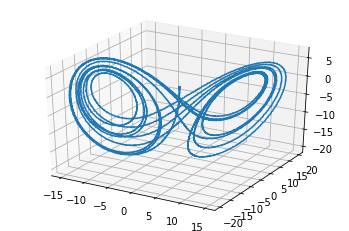

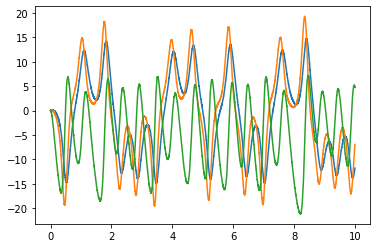

In [3]:
ax = plt.figure().add_subplot(111, projection=Axes3D.name)
ax.plot(*sim.data[state_probe].T)

plt.figure()
plt.plot(sim.trange(), sim.data[state_probe])